# Medical NLP

Playgrounds via https://www.fast.ai/2019/07/08/fastai-nlp/

`2-svd-nmf-topic-modeling`

In [99]:
import numpy as np
from scipy import linalg

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition
import nltk

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Data

In [72]:
def get_abstracts():
    with open("../data/abstracts_manual.txt") as f:
        x = f.read()
    x = x.split("\n\n")
    x = [i.replace("\n", " ") for i in x]
    return(x)

In [73]:
abstracts = get_abstracts()

len(abstracts)

18

# Create document-term matrix

- rows: documents
- columns: vocabulary (excludes stopwords)
- cells: 0/1 for vocab no/yes

In [74]:
vectorizer = CountVectorizer(stop_words='english')

In [75]:
vectors = vectorizer.fit_transform(abstracts).todense()
vectors.shape

(18, 1059)

In [77]:
vocab = np.array(vectorizer.get_feature_names_out())

vocab[400:405]

array(['fruit', 'fulfill', 'function', 'functional', 'fundamental'],
      dtype=object)

In [180]:
# show vocab from a selected document
document_index = 0

index_of_vocab_in_document = np.asarray(vectors[document_index]).flatten()==1
vectorizer.get_feature_names_out()[index_of_vocab_in_document]

array(['adjacent', 'advanced', 'advent', 'agnostic', 'alterations',
       'appearing', 'approved', 'benefited', 'biology', 'breakthroughs',
       'bringing', 'burden', 'cause', 'cellular', 'characterized',
       'chronic', 'collates', 'collectively', 'conditions', 'crucial',
       'current', 'deaths', 'demarcating', 'diagnosis', 'directions',
       'disease', 'dismal', 'drugs', 'earliest', 'enable', 'evidence',
       'fare', 'fatal', 'focus', 'forth', 'fruit', 'fulfill', 'greatly',
       'hanging', 'health', 'heavy', 'highlight', 'ideal', 'identify',
       'imbalance', 'importantly', 'inflammatory', 'inflicting',
       'insights', 'introducing', 'investigating', 'investigations',
       'learning', 'light', 'low', 'microbiome', 'microenvironment',
       'molecular', 'multidimensional', 'naïve', 'normal', 'novel',
       'number', 'obstructive', 'opportunities', 'outcome', 'outcomes',
       'paradigm', 'particular', 'patient', 'patients', 'personalized',
       'poor', 'possi

In [182]:
abstracts[document_index]

"Lung cancer is the number one cause of cancer-related deaths. The malignancy is characterized by dismal prognosis and poor clinical outcome mostly due to advanced-stage at diagnosis, thereby inflicting a heavy burden on public health worldwide. Recent breakthroughs in immunotherapy have greatly benefited a subset  of lung cancer patients, and more importantly, they are undauntedly bringing forth a paradigm shift in the drugs approved for cancer treatment, by introducing “tumor-type agnostic therapies”. Yet, and to fulfill immunotherapy's potential of personalized cancer treatment, demarcating the immune and genomic landscape of cancers at their earliest possible stages will be crucial to identify ideal targets for early treatment and to predict how a particular patient will fare with immunotherapy. Recent genomic surveys of premalignant lung cancer have shed  light on early alterations in the evolution of lung cancer. More recently, the advent of immunogenomic technologies has provide

### Get topics with SVD

In [190]:
# number of documents, number of words excl stop words
len(abstracts), len(vocab)

(18, 1059)

In [191]:
# document-term matrix
vectors.shape

(18, 1059)

In [115]:
U, s, Vh = linalg.svd(vectors, full_matrices=False)

U.shape, s.shape, Vh.shape

((18, 18), (18,), (18, 1059))

In [87]:
s

array([38.47294266, 25.03227296, 21.04217857, 18.15915546, 15.64644518,
       14.38984124, 13.78320562, 13.40697519, 13.08663461, 12.82269295,
       12.1978841 , 11.70776251, 11.53264448, 11.30279558, 10.7879368 ,
        9.71836512,  9.38083575,  8.54191855])

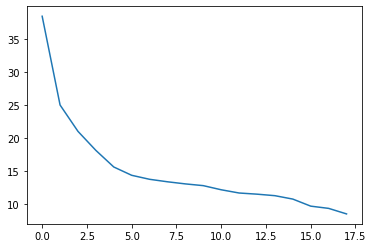

In [86]:
plt.plot(s);

In [92]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [201]:
# in order: abstracts 10, 18, ...
show_topics(Vh[:18])

['peptide nanoplexes immunocompetent rnai aggressive product term exists',
 'cancer lung 273h immune mice tp53 spc human',
 'cell immune response icis cells molecular dna patients',
 'dna ddr radiotherapy damage pathways wee1 cycle repair',
 'lung based early targets genomic cancer pdlim2 deaths',
 'pd pdlim2 anti combination cell genes synthetic epigenetic',
 'treatment immune cell review mechanisms disease recently inhibitors',
 'therapeutic disease pd despite therapies novel complex cancers',
 'pd nsclc inhibitors treatment outcomes patients ythdf1 l1',
 'rnas non hallmarks coding ythdf1 mechanisms cells involved',
 'cancer wee1 pdlim2 pkmyt1 resistance pd anti epigenetic',
 'rnas coding hallmarks non include transcriptional affect early',
 'immune responses pathways mechanisms rnas subsets non understanding',
 'patients inhibitors pd nsclc outcomes approaches l1 chemoprevention',
 'effects curcumin strategies trials approaches chemoprevention mechanisms underlying',
 'effects curcu

### Get topics with NMF

In [209]:
d=3  # num topics

In [329]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(np.asarray(vectors))
H1 = clf.components_

W1.shape, H1.shape

/Users/paczuskp/Envs/nlp-playgrounds/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


((18, 3), (3, 1059))

In [330]:
show_topics(H1)

['cancer lung immune tumor cell response icis molecular',
 'egfr resistance emt activation transformation cell sclc tki',
 'lung cancer tp53 273h mice human spc mouse']

In [331]:
# cluster membership: find highest value in each document (row)
W1

array([[2.17720004, 0.        , 0.7166273 ],
       [1.20511165, 0.09130238, 0.        ],
       [0.86660877, 0.30381109, 0.41883758],
       [1.1182086 , 0.31377201, 0.61794207],
       [1.68592413, 0.30186042, 0.        ],
       [0.63009331, 0.02531604, 0.07273609],
       [0.88423196, 0.05403301, 0.        ],
       [0.79229431, 0.37830103, 0.        ],
       [3.1748937 , 0.        , 0.        ],
       [0.57311873, 0.13458006, 0.03050993],
       [0.68846852, 0.23501579, 0.        ],
       [0.        , 5.22955419, 0.        ],
       [0.9743455 , 0.16714631, 0.29705978],
       [0.53034079, 0.04284913, 0.48145664],
       [0.90215609, 0.        , 0.83104029],
       [1.13235704, 0.04513192, 0.        ],
       [0.53461128, 0.18881508, 0.08906987],
       [0.        , 0.        , 5.6164572 ]])

In [336]:
cluster_membership_index = np.argmax(W1, axis=1)
cluster_membership_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2])

In [337]:
# tuple?
np.where(cluster_membership_index==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16]),)

In [333]:
def get_members_for_cluster(W1, i):
    cluster_membership_index = np.argmax(W1, axis=1)
    members = np.where(cluster_membership_index==i)
    members = np.array(members).flatten()
    return(members)

In [334]:
cluster_membership_index = np.argmax(W1, axis=1)

for i in range(d):
    m = get_members_for_cluster(W1, i)
    print(f"Cluster {i}: {m}")

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
Cluster 0: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16]
Cluster 1: [11]
Cluster 2: [17]


In [354]:
[abstracts[x] for x in [5, 7, 10]]

['Recent research on cancer-associated microbial communities has elucidated the interplay between bacteria, immune cells, and tumor cells; the bacterial pathways involved in the induction of carcinogenesis; and their clinical significance. Although accumulating evidence shows that a dysbiotic condition is associated with lung carcinogenesis, the underlying mechanisms remain unclear. Microorganisms possibly trigger tumor initiation and progression, presumably via  the production of bacterial toxins and other pro-inflammatory factors. The purpose of this review is to discuss the basic role of the airway microbiome in carcinogenesis and the underlying molecular mechanisms, with the aim of developing anticancer strategies involving the airway microbiota. In addition, the mechanisms via which the microbiome acts as a modulator of immunotherapies in lung cancer are summarized.',
 'Small cell lung cancer (SCLC) accounts for approximately 10–15% of all lung cancers. The prognosis is poor with 

### Get topics with TF-IDF

In [321]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(abstracts) # (documents, vocab)

# increase iters for convergence
clf = decomposition.NMF(n_components=d, random_state=1, max_iter=800)

W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

W1.shape, H1.shape

/Users/paczuskp/Envs/nlp-playgrounds/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


((18, 3), (3, 1059))

In [322]:
show_topics(H1)

['immune pd cancer nsclc icis patients lung treatment',
 'dna wee1 damage ddr radiotherapy cycle pkmyt1 synthetic',
 'lung cancer effects carcinogenesis approaches mechanisms underlying therapeutic']

In [323]:
W1

array([[0.25843708, 0.        , 0.29999615],
       [0.47254607, 0.        , 0.        ],
       [0.        , 0.        , 0.57922006],
       [0.29840532, 0.        , 0.10764621],
       [0.4260182 , 0.03581871, 0.01811018],
       [0.        , 0.        , 0.48100115],
       [0.50049112, 0.        , 0.        ],
       [0.02374477, 0.21574509, 0.28619313],
       [0.48159316, 0.        , 0.01512005],
       [0.        , 0.58257313, 0.        ],
       [0.        , 0.68907034, 0.        ],
       [0.06304803, 0.02917146, 0.2710684 ],
       [0.02597813, 0.00911979, 0.33058655],
       [0.        , 0.        , 0.52794392],
       [0.        , 0.        , 0.49730509],
       [0.05108084, 0.70136619, 0.        ],
       [0.20923005, 0.03286954, 0.00141869],
       [0.00914124, 0.        , 0.42890102]])

In [324]:
cluster_membership_index = np.argmax(W1, axis=1)
print(cluster_membership_index)

for i in range(d):
    members = np.where(cluster_membership_index==i)
    members = np.array(members).flatten()
    print(f"Cluster {i}: {members}")

[2 0 2 0 0 2 0 2 0 1 1 2 2 2 2 1 0 2]
Cluster 0: [ 1  3  4  6  8 16]
Cluster 1: [ 9 10 15]
Cluster 2: [ 0  2  5  7 11 12 13 14 17]


In [327]:
get_members_for_cluster(W1, 1)

array([ 9, 10, 15])

In [ ]:
def get_cluster_membership_index(W1):
    return(np.argmax(W1, axis=1))    

# Temp: data

In [7]:
from sklearn.datasets import fetch_20newsgroups

In [9]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [55]:
len(newsgroups_train.data)

2034

In [33]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [37]:
newsgroups_train.target[:3]

array([1, 3, 2])

In [35]:
newsgroups_train.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']